##  Preambule

In [5]:
import numpy as np
from tqdm import tqdm
from importlib import reload
import xarray as xr
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Read data

In [6]:
xr_dataread = xr.open_dataset('K:/data/DataUpdate_ongoing/xr_dataread.nc').copy()
path_data = "K:/data/DataUpdate_ongoing/"
all_countries_iso = np.load(path_data + "all_countries.npy", allow_pickle=True)
all_regions_iso = np.load(path_data + "all_regions.npy", allow_pickle=True)

## Plot

In [7]:
year = 2040
ln = 0.1
fz = 10
f2=1.8

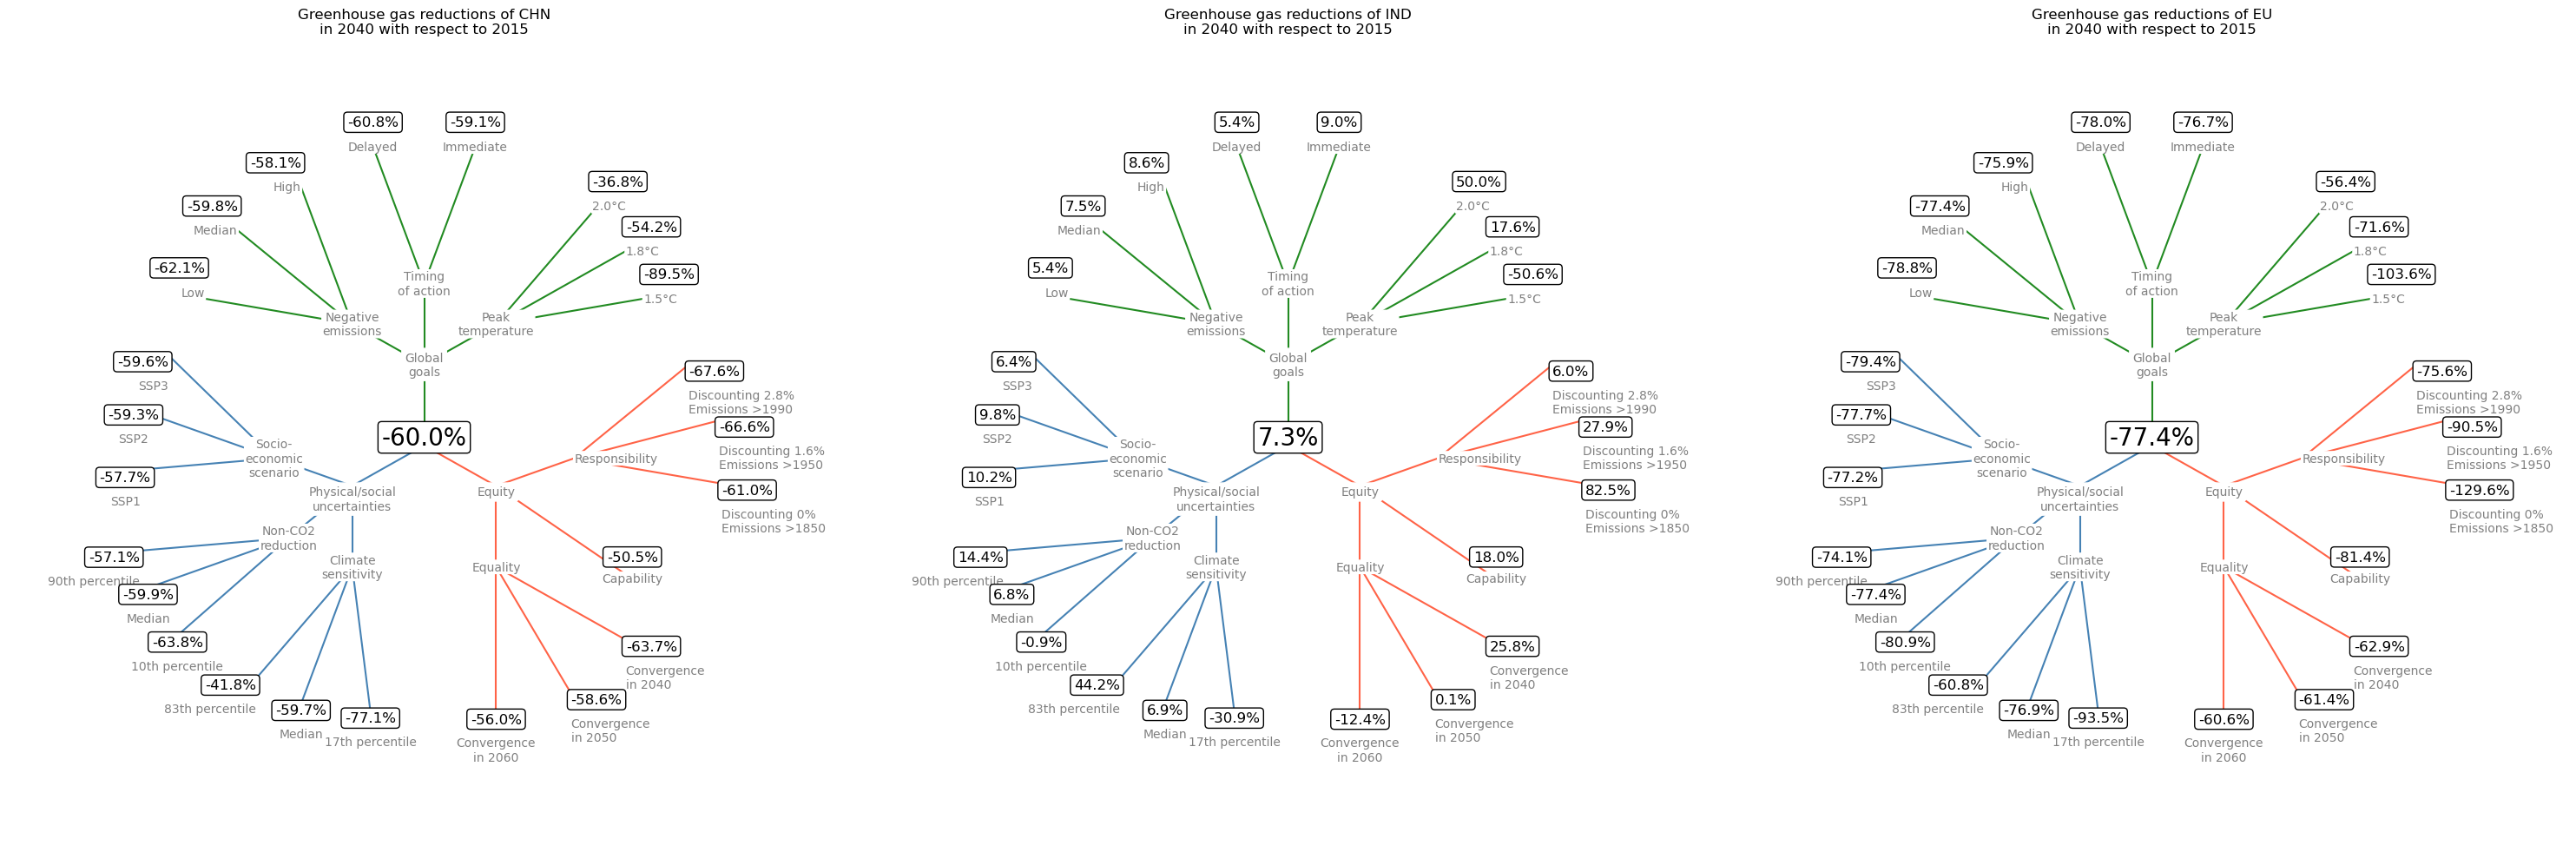

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
for ax_i, ax in enumerate([ax1, ax2, ax3]):
        reg = ['CHN', 'IND', 'EU'][ax_i]
        emis_2015 = float(xr_dataread.sel(Time=2015, Region=reg).GHG_hist)
        xr_reg = xr.open_dataset('K:/data/DataUpdate_ongoing/Allocations/xr_alloc_'+reg+'.nc').copy()
        data = (xr_reg.sel(Time=year, Temperature=[1.5, 1.6, 1.7, 1.8, 1.9, 2.0])[['PCC', 'ECPC', 'AP']] - emis_2015) / emis_2015
        ax.set_title('Greenhouse gas reductions of '+reg+'\nin 2040 with respect to 2015')
        ax.axis('off')
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        ax.plot([0.5], [0.5], 'ko', zorder=1e9)
        # ax.plot([0.5, 0.5], [0.5, 0.5+ln], c='forestgreen')
        # ax.plot([0.5, 0.5 - np.sqrt(0.5*ln**2)], [0.5, 0.5 - np.sqrt(0.5*ln**2)], c='tomato')
        # ax.plot([0.5, 0.5 + np.sqrt(0.5*ln**2)], [0.5, 0.5 - np.sqrt(0.5*ln**2)], c='steelblue')

        for title_i, title in enumerate(['Global\ngoals', 'Equity', 'Physical/social\nuncertainties']):
                center_x = 0.5+[ln*np.cos(90/360*np.pi*2), ln*np.cos(-30/360*np.pi*2), ln*np.cos(-150/360*np.pi*2)][title_i]
                center_y = 0.5+[ln*np.sin(90/360*np.pi*2), ln*np.sin(-30/360*np.pi*2), ln*np.sin(-150/360*np.pi*2)][title_i]
                ax.plot([0.5, center_x], [0.5, center_y], c=['forestgreen', 'tomato', 'steelblue'][title_i])
                ax.text(center_x,
                        center_y,
                        title,
                        ha=['center', 'center', 'center'][title_i], va=['center', 'top', 'top'][title_i],
                        bbox=dict(facecolor='white', edgecolor='w', boxstyle='round, pad=0.25'),
                        fontsize=fz,
                        color='grey')
        
                # Global goals
                if title_i == 0:
                        for ang_i, ang in enumerate([30, 90, 150]):
                                center_x2 = center_x + ln*np.cos(ang/360*2*np.pi)
                                center_y2 = center_y + ln*np.sin(ang/360*2*np.pi)
                                ax.plot([center_x, center_x2], [center_y, center_y2], c='forestgreen')
                                ax.text(center_x2, center_y2, ['Peak\ntemperature', 'Timing\nof action', 'Negative\nemissions'][ang_i],
                                        ha=['center', 'center', 'center'][ang_i],
                                        bbox=dict(facecolor='white', edgecolor='w', boxstyle='round, pad=0.05'),
                                        fontsize=fz, va='center', color='grey')

                                if ang_i == 0:
                                        for ang2_i, ang2 in enumerate([10, 30, 50]):
                                                center_x3 = center_x2 + ln*f2*np.cos(ang2/360*2*np.pi)
                                                center_y3 = center_y2 + ln*f2*np.sin(ang2/360*2*np.pi)
                                                ax.plot([center_x2, center_x3], [center_y2, center_y3], c='forestgreen')
                                                ax.text(center_x3, center_y3, ['1.5°C', '1.8°C', '2.0°C'][ang2_i],
                                                        ha=['left', 'left', 'left', 'left'][ang2_i],
                                                        va=['center', 'center', 'bottom', 'bottom'][ang2_i],
                                                        bbox=dict(facecolor='white', edgecolor='w', boxstyle='round, pad=0.05'),
                                                        fontsize=fz, color='grey')
                                                ax.text(center_x3, center_y3+0.03,
                                                        str(np.round(float((data.sel(Temperature=[1.5, 1.8, 2.0][ang2_i]).to_array().median()*100)),1))+'%',
                                                        ha=['left', 'left', 'left', 'left'][ang2_i],
                                                        va=['center', 'center', 'bottom', 'bottom'][ang2_i],
                                                        bbox=dict(facecolor='white', edgecolor='k', boxstyle='round, pad=0.25'),
                                                        fontsize=12, color='k', zorder=1e9)

                                if ang_i == 1:
                                        for ang2_i, ang2 in enumerate([70, 110]):
                                                center_x3 = center_x2 + ln*f2*np.cos(ang2/360*2*np.pi)
                                                center_y3 = center_y2 + ln*f2*np.sin(ang2/360*2*np.pi)
                                                ax.plot([center_x2, center_x3], [center_y2, center_y3], c='forestgreen')
                                                ax.text(center_x3, center_y3, ['Immediate', 'Delayed'][ang2_i],
                                                        ha=['center', 'center', 'left', 'left'][ang2_i],
                                                        va=['center', 'center', 'bottom', 'bottom'][ang2_i],
                                                        bbox=dict(facecolor='white', edgecolor='w', boxstyle='round, pad=0.05'),
                                                        fontsize=fz, color='grey')
                                                ax.text(center_x3, center_y3+0.03,
                                                        str(np.round(float((data.sel(Timing=['Immediate', 'Delayed'][ang2_i]).to_array().median()*100)),1))+'%',
                                                        ha=['center', 'center', 'left', 'left'][ang2_i],
                                                        va=['center', 'center', 'bottom', 'bottom'][ang2_i],
                                                        bbox=dict(facecolor='white', edgecolor='k', boxstyle='round, pad=0.25'),
                                                        fontsize=12, color='k', zorder=1e9)

                                if ang_i == 2:
                                        for ang2_i, ang2 in enumerate([110, 140, 170]):
                                                center_x3 = center_x2 + ln*f2*np.cos(ang2/360*2*np.pi)
                                                center_y3 = center_y2 + ln*f2*np.sin(ang2/360*2*np.pi)
                                                ax.plot([center_x2, center_x3], [center_y2, center_y3], c='forestgreen')
                                                ax.text(center_x3, center_y3, ['High', 'Median', 'Low'][ang2_i],
                                                        ha=['right', 'right', 'right', 'left'][ang2_i],
                                                        va=['center', 'center', 'bottom', 'bottom'][ang2_i],
                                                        bbox=dict(facecolor='white', edgecolor='w', boxstyle='round, pad=0.05'),
                                                        fontsize=fz, color='grey')
                                                ax.text(center_x3, center_y3+0.03,
                                                        str(np.round(float((data.sel(NegEmis=[0.8, 0.5, 0.2][ang2_i]).to_array().median()*100)),1))+'%',
                                                        ha=['right', 'right', 'right', 'left'][ang2_i],
                                                        va=['center', 'center', 'bottom', 'bottom'][ang2_i],
                                                        bbox=dict(facecolor='white', edgecolor='k', boxstyle='round, pad=0.25'),
                                                        fontsize=12, color='k', zorder=1e9)

                # Equity
                if title_i == 1:
                        for ang_i, ang in enumerate([20, -35, -90]):
                                center_x2 = center_x + ln*np.cos(ang/360*2*np.pi)*[1, 2, 1][ang_i]
                                center_y2 = center_y + ln*np.sin(ang/360*2*np.pi)*[1, 2, 1][ang_i]
                                ax.plot([center_x, center_x2], [center_y, center_y2], c='tomato')
                                ax.text(center_x2, center_y2,
                                        ['Responsibility', 'Capability', 'Equality'][ang_i],
                                        ha=['left', 'center', 'center'][ang_i],
                                        bbox=dict(facecolor='white', edgecolor='w', boxstyle='round, pad=0.05'),
                                        fontsize=fz, va='center', color='grey')

                                if ang_i == 0:
                                        for ang2_i, ang2 in enumerate([40, 15, -10]):
                                                center_x3 = center_x2 + ln*f2*np.cos(ang2/360*2*np.pi)
                                                center_y3 = center_y2 + ln*f2*np.sin(ang2/360*2*np.pi)
                                                ax.plot([center_x2, center_x3], [center_y2, center_y3], c='tomato')
                                                ax.text(center_x3, center_y3-0.03, ['Discounting 2.8%\nEmissions >1990', 'Discounting 1.6%\nEmissions >1950', 'Discounting 0%\nEmissions >1850'][ang2_i],
                                                        ha=['left', 'left', 'left', 'left'][ang2_i],
                                                        va=['top', 'top', 'top', 'bottom'][ang2_i],
                                                        bbox=dict(facecolor='white', edgecolor='w', boxstyle='round, pad=0.05'),
                                                        fontsize=fz, color='grey')
                                                ax.text(center_x3, center_y3,
                                                        str(np.round(float((data.sel(Discount_factor=[2.8, 1.6, 0][ang2_i], Historical_startyear=[1990, 1950, 1850][ang2_i])[['ECPC']].to_array().median()*100)),1))+'%',
                                                        ha=['left', 'left', 'left', 'left'][ang2_i],
                                                        va=['top', 'top', 'top', 'bottom'][ang2_i],
                                                        bbox=dict(facecolor='white', edgecolor='k', boxstyle='round, pad=0.25'),
                                                        fontsize=12, color='k', zorder=1e9)

                                if ang_i == 1:
                                        ax.text(center_x2, center_y2+0.035,
                                                str(np.round(float((data[['AP']].to_array().median()*100)),1))+'%',
                                                ha='center',
                                                va='top',
                                                bbox=dict(facecolor='white', edgecolor='k', boxstyle='round, pad=0.25'),
                                                fontsize=12, color='k', zorder=1e9)

                                if ang_i == 2:
                                        for ang2_i, ang2 in enumerate([-30, -60, -90]):
                                                center_x3 = center_x2 + ln*f2*np.cos(ang2/360*2*np.pi)
                                                center_y3 = center_y2 + ln*f2*np.sin(ang2/360*2*np.pi)
                                                ax.plot([center_x2, center_x3], [center_y2, center_y3], c='tomato')
                                                ax.text(center_x3, center_y3-0.03, ['Convergence\nin 2040', 'Convergence\nin 2050', 'Convergence\nin 2060'][ang2_i],
                                                        ha=['left', 'left', 'center', 'left'][ang2_i],
                                                        va=['top', 'top', 'top', 'bottom'][ang2_i],
                                                        bbox=dict(facecolor='white', edgecolor='w', boxstyle='round, pad=0.05'),
                                                        fontsize=fz, color='grey')
                                                ax.text(center_x3, center_y3,
                                                        str(np.round(float((data.sel(Convergence_year=[2040, 2050, 2060][ang2_i])[['PCC']].to_array().median()*100)),1))+'%',
                                                        ha=['left', 'left', 'center', 'left'][ang2_i],
                                                        va=['top', 'top', 'top', 'bottom'][ang2_i],
                                                        bbox=dict(facecolor='white', edgecolor='k', boxstyle='round, pad=0.25'),
                                                        fontsize=12, color='k', zorder=1e9)

                # Physical/social uncertainties
                if title_i == 2:
                        for ang_i, ang in enumerate([-90, -140, 160]):
                                center_x2 = center_x + ln*np.cos(ang/360*2*np.pi)
                                center_y2 = center_y + ln*np.sin(ang/360*2*np.pi)
                                ax.plot([center_x, center_x2], [center_y, center_y2], c='steelblue')
                                ax.text(center_x2, center_y2,
                                        ['Climate\nsensitivity', 'Non-CO2\nreduction', 'Socio-\neconomic\nscenario'][ang_i],
                                        ha=['center', 'center', 'center'][ang_i],
                                        bbox=dict(facecolor='white', edgecolor='w', boxstyle='round, pad=0.05'),
                                        fontsize=fz, va='center', color='grey')

                                if ang_i == 0:
                                        for ang2_i, ang2 in enumerate([-83, -110, -130]):
                                                center_x3 = center_x2 + ln*f2*np.cos(ang2/360*2*np.pi)
                                                center_y3 = center_y2 + ln*f2*np.sin(ang2/360*2*np.pi)
                                                ax.plot([center_x2, center_x3], [center_y2, center_y3], c='steelblue')
                                                ax.text(center_x3, center_y3-0.03, ['17th percentile', 'Median', '83th percentile'][ang2_i],
                                                        ha=['center', 'center', 'right', 'left'][ang2_i],
                                                        va=['top', 'top', 'top', 'bottom'][ang2_i],
                                                        bbox=dict(facecolor='white', edgecolor='w', boxstyle='round, pad=0.05'),
                                                        fontsize=fz, color='grey')
                                                ax.text(center_x3, center_y3,
                                                        str(np.round(float((data.sel(Risk=[0.17, 0.5, 0.83][ang2_i]).to_array().median()*100)),1))+'%',
                                                        ha=['center', 'center', 'right', 'left'][ang2_i],
                                                        va=['top', 'top', 'top', 'bottom'][ang2_i],
                                                        bbox=dict(facecolor='white', edgecolor='k', boxstyle='round, pad=0.25'),
                                                        fontsize=12, color='k', zorder=1e9)

                                if ang_i == 1:
                                        for ang2_i, ang2 in enumerate([-138, -160, -175]):
                                                center_x3 = center_x2 + ln*f2*np.cos(ang2/360*2*np.pi)
                                                center_y3 = center_y2 + ln*f2*np.sin(ang2/360*2*np.pi)
                                                ax.plot([center_x2, center_x3], [center_y2, center_y3], c='steelblue')
                                                ax.text(center_x3, center_y3-0.03, ['10th percentile', 'Median', '90th percentile'][ang2_i],
                                                        ha=['center', 'center', 'right', 'left'][ang2_i],
                                                        va=['top', 'top', 'top', 'bottom'][ang2_i],
                                                        bbox=dict(facecolor='white', edgecolor='w', boxstyle='round, pad=0.05'),
                                                        fontsize=fz, color='grey')
                                                ax.text(center_x3, center_y3,
                                                        str(np.round(float((data.sel(NonCO2red=[0.1, 0.5, 0.9][ang2_i]).to_array().median()*100)),1))+'%',
                                                        ha=['center', 'center', 'right', 'left'][ang2_i],
                                                        va=['top', 'top', 'top', 'bottom'][ang2_i],
                                                        bbox=dict(facecolor='white', edgecolor='k', boxstyle='round, pad=0.25'),
                                                        fontsize=12, color='k', zorder=1e9)

                                if ang_i == 2:
                                        for ang2_i, ang2 in enumerate([-175, -200, -225]):
                                                center_x3 = center_x2 + ln*f2*np.cos(ang2/360*2*np.pi)
                                                center_y3 = center_y2 + ln*f2*np.sin(ang2/360*2*np.pi)
                                                ax.plot([center_x2, center_x3], [center_y2, center_y3], c='steelblue')
                                                ax.text(center_x3, center_y3-0.03, ['SSP1', 'SSP2', 'SSP3'][ang2_i],
                                                        ha=['center', 'center', 'right', 'left'][ang2_i],
                                                        va=['top', 'top', 'top', 'bottom'][ang2_i],
                                                        bbox=dict(facecolor='white', edgecolor='w', boxstyle='round, pad=0.05'),
                                                        fontsize=fz, color='grey')
                                                ax.text(center_x3, center_y3,
                                                        str(np.round(float((data.sel(Scenario=['SSP1', 'SSP2', 'SSP3'][ang2_i]).to_array().median()*100)),1))+'%',
                                                        ha=['center', 'center', 'right', 'left'][ang2_i],
                                                        va=['top', 'top', 'top', 'bottom'][ang2_i],
                                                        bbox=dict(facecolor='white', edgecolor='k', boxstyle='round, pad=0.25'),
                                                        fontsize=12, color='k', zorder=1e9)

        ax.text(0.5, 0.5+0.01, str(np.round(float((data.to_array().median()*100)),1))+'%', ha='center', va='center', fontsize=20, bbox=dict(facecolor='white', edgecolor='k', boxstyle='round, pad=0.15'), zorder=1e99)
        # for ang in [-90, 30, 150]:
        #         ax.plot([0.5, 0.5+0.4*np.cos(ang/360*2*np.pi)], [0.5, 0.5+0.4*np.sin(ang/360*2*np.pi)], c='grey', linestyle='-', linewidth=0.5)
fig.tight_layout()
plt.savefig('K:/Code/EffortSharing/Figures/Paper_FairShares/Figure_2.png', dpi=200, bbox_inches='tight')

## Plot 2.0

In [9]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.colors import n_colors

In [10]:
settings_default = {'Temperature': 1.6,
                   'Risk': 0.5,
                   'NegEmis': 0.5,
                   'NonCO2red': 0.5,
                   'Timing': "Immediate",
                   'Convergence_year': 2050,
                   'Scenario': 'SSP2',
                   'Discount_factor': 0,
                   'Historical_startyear': 1950,}
                   #'Capability_threshold': "Th",
                   #'RCI_weight': "Half"}

In [11]:
ctys = all_countries_iso
dataset = xr.open_dataset('K:/data/DataUpdate_ongoing/xr_alloc_2040.nc').sel(Temperature=[1.5, 1.6, 1.7, 1.8, 1.9, 2.0]).copy()[['PCC', 'ECPC', 'AP']]

titles = ['Default', '1.5°C', '1.8°C', '2.0°C', 'Delayed', 'High','Low',
          'SSP1', 'SSP3', '90th<br>percentile', '10th<br>percentile', '83th<br>percentile', '17th<br>percentile',
          'Converged<br>in 2040', 'Converged<br>in 2050', 'Converged<br>in 2060', 'Capability',
          '0%,<br>>1850', '1.6%,<br>>1950', '2.8%,<br>>1990']
vals = np.zeros((len(ctys), len(titles)))
fullmedian = np.zeros(len(ctys))
for cty_i, cty in tqdm(enumerate(ctys)):
    data = dataset.sel(Region=cty)
    emis_2015 = float(xr_dataread.sel(Time=2015, Region=cty).GHG_hist)
    fullmedian[cty_i] = (float(data.sel(**settings_default).to_array().median())-emis_2015)/emis_2015

    vals[cty_i, 0] = (float(data.sel(**settings_default).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 1] = (float(data.sel(**{key: settings_default[key] for key in settings_default if key != 'Temperature'}).sel(Temperature=1.5).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 2] = (float(data.sel(**{key: settings_default[key] for key in settings_default if key != 'Temperature'}).sel(Temperature=1.8).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 3] = (float(data.sel(**{key: settings_default[key] for key in settings_default if key != 'Temperature'}).sel(Temperature=2.0).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 4] = (float(data.sel(**{key: settings_default[key] for key in settings_default if key != 'Timing'}).sel(Timing='Delayed').to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 5] = (float(data.sel(**{key: settings_default[key] for key in settings_default if key != 'NegEmis'}).sel(NegEmis=0.8).to_array().median())-emis_2015)/emis_2015
    #vals[cty_i, 7] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'NegEmis'}).sel(NegEmis=0.5).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 6] = (float(data.sel(**{key: settings_default[key] for key in settings_default if key != 'NegEmis'}).sel(NegEmis=0.2).to_array().median())-emis_2015)/emis_2015

    vals[cty_i, 7] = (float(data.sel(**{key: settings_default[key] for key in settings_default if key != 'Scenario'}).sel(Scenario='SSP1').to_array().median())-emis_2015)/emis_2015
    #vals[cty_i, 10] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'Scenario'}).sel(Scenario='SSP2').to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 8] = (float(data.sel(**{key: settings_default[key] for key in settings_default if key != 'Scenario'}).sel(Scenario='SSP3').to_array().median())-emis_2015)/emis_2015

    vals[cty_i, 9] = (float(data.sel(**{key: settings_default[key] for key in settings_default if key != 'NonCO2red'}).sel(NonCO2red=0.9).to_array().median())-emis_2015)/emis_2015
    #vals[cty_i, 13] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'NonCO2red'}).sel(NonCO2red=0.5).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 10] = (float(data.sel(**{key: settings_default[key] for key in settings_default if key != 'NonCO2red'}).sel(NonCO2red=0.1).to_array().median())-emis_2015)/emis_2015

    vals[cty_i, 11] = (float(data.sel(**{key: settings_default[key] for key in settings_default if key != 'Risk'}).sel(Risk=0.17).to_array().median())-emis_2015)/emis_2015
   # vals[cty_i, 16] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'Risk'}).sel(Risk=0.5).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 12] = (float(data.sel(**{key: settings_default[key] for key in settings_default if key != 'Risk'}).sel(Risk=0.83).to_array().median())-emis_2015)/emis_2015

    vals[cty_i, 13] = (float(data.sel(**{key: settings_default[key] for key in settings_default if key != 'Convergence_year'})[['PCC']].sel(Convergence_year=2040).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 14] = (float(data.sel(**{key: settings_default[key] for key in settings_default if key != 'Convergence_year'})[['PCC']].sel(Convergence_year=2050).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 15] = (float(data.sel(**{key: settings_default[key] for key in settings_default if key != 'Convergence_year'})[['PCC']].sel(Convergence_year=2060).to_array().median())-emis_2015)/emis_2015
    
    vals[cty_i, 16] = (float(data.sel(**settings_default)[['AP']].to_array().median())-emis_2015)/emis_2015

    vals[cty_i, 17] = (float(data.sel(**{key: settings_default[key] for key in settings_default if key not in ['Discount_factor', 'Historical_startyear']})[['ECPC']].sel(Discount_factor=0, Historical_startyear=1850).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 18] = (float(data.sel(**{key: settings_default[key] for key in settings_default if key not in ['Discount_factor', 'Historical_startyear']})[['ECPC']].sel(Discount_factor=1.6, Historical_startyear=1950).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 19] = (float(data.sel(**{key: settings_default[key] for key in settings_default if key not in ['Discount_factor', 'Historical_startyear']})[['ECPC']].sel(Discount_factor=2.8, Historical_startyear=1990).to_array().median())-emis_2015)/emis_2015
vals_dev_all = np.round(100*(vals.T-fullmedian),1).T
vals_all = np.round(100*vals, 1)

197it [01:10,  2.80it/s]


In [95]:
titles = ['Default', '1.5°C', '1.8°C', '2.0°C', 'Delayed', 'High','Low',
          'SSP1', 'SSP3', '90<sup>th</sup> perc', '10<sup>th</sup> perc', '83<sup>th</sup> perc', '17<sup>th</sup> perc',
          'Converged<br>in 2040', 'Converged<br>in 2050', 'Converged<br>in 2060', 'Capability',
          '0%,<br>>1850', '1.6%,<br>>1950', '2.8%,<br>>1990']

In [45]:
ctys = ['USA', 'EU', 'RUS', 'BRA', 'IND', 'CHN', 'ZAF', 'UGA', 'VNM', 'HND']
year = 2040
datasets = [xr.open_dataset('K:/data/DataUpdate_ongoing/Allocations/xr_alloc_'+cty+'.nc').sel(Temperature=[1.5, 1.6, 1.7, 1.8, 1.9, 2.0]).copy()[['PCC', 'ECPC', 'AP']] for cty in ctys]

vals = np.zeros((len(ctys), len(titles)))
fullmedian = np.zeros(len(ctys))
for cty_i, cty in enumerate(ctys):
    data = datasets[cty_i]
    emis_2015 = float(xr_dataread.sel(Time=2015, Region=cty).GHG_hist)
    fullmedian[cty_i] = (float(data.sel(Time=year, **settings_default).to_array().median())-emis_2015)/emis_2015

    vals[cty_i, 0] = (float(data.sel(Time=year, **settings_default).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 1] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'Temperature'}).sel(Temperature=1.5).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 2] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'Temperature'}).sel(Temperature=1.8).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 3] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'Temperature'}).sel(Temperature=2.0).to_array().median())-emis_2015)/emis_2015
    
    #vals[cty_i, 4] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'Timing'}).sel(Timing='Immediate').to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 4] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'Timing'}).sel(Timing='Delayed').to_array().median())-emis_2015)/emis_2015

    vals[cty_i, 5] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'NegEmis'}).sel(NegEmis=0.8).to_array().median())-emis_2015)/emis_2015
    #vals[cty_i, 7] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'NegEmis'}).sel(NegEmis=0.5).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 6] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'NegEmis'}).sel(NegEmis=0.2).to_array().median())-emis_2015)/emis_2015

    vals[cty_i, 7] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'Scenario'}).sel(Scenario='SSP1').to_array().median())-emis_2015)/emis_2015
    #vals[cty_i, 10] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'Scenario'}).sel(Scenario='SSP2').to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 8] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'Scenario'}).sel(Scenario='SSP3').to_array().median())-emis_2015)/emis_2015

    vals[cty_i, 9] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'NonCO2red'}).sel(NonCO2red=0.9).to_array().median())-emis_2015)/emis_2015
    #vals[cty_i, 13] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'NonCO2red'}).sel(NonCO2red=0.5).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 10] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'NonCO2red'}).sel(NonCO2red=0.1).to_array().median())-emis_2015)/emis_2015

    vals[cty_i, 11] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'Risk'}).sel(Risk=0.17).to_array().median())-emis_2015)/emis_2015
   # vals[cty_i, 16] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'Risk'}).sel(Risk=0.5).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 12] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'Risk'}).sel(Risk=0.83).to_array().median())-emis_2015)/emis_2015

    vals[cty_i, 13] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'Convergence_year'})[['PCC']].sel(Convergence_year=2040).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 14] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'Convergence_year'})[['PCC']].sel(Convergence_year=2050).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 15] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key != 'Convergence_year'})[['PCC']].sel(Convergence_year=2060).to_array().median())-emis_2015)/emis_2015
    
    vals[cty_i, 16] = (float(data.sel(Time=year, **settings_default)[['AP']].to_array().median())-emis_2015)/emis_2015

    vals[cty_i, 17] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key not in ['Discount_factor', 'Historical_startyear']})[['ECPC']].sel(Discount_factor=0, Historical_startyear=1850).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 18] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key not in ['Discount_factor', 'Historical_startyear']})[['ECPC']].sel(Discount_factor=1.6, Historical_startyear=1950).to_array().median())-emis_2015)/emis_2015
    vals[cty_i, 19] = (float(data.sel(Time=year, **{key: settings_default[key] for key in settings_default if key not in ['Discount_factor', 'Historical_startyear']})[['ECPC']].sel(Discount_factor=2.8, Historical_startyear=1990).to_array().median())-emis_2015)/emis_2015
vals_dev = np.round(100*(vals.T-fullmedian),1).T
vals = np.round(100*vals, 1)

In [46]:
cols = np.zeros((len(vals_dev)+1, len(vals_dev[0]))).astype(str)
cols = np.array(['rgba(0,0,0,0.20000000000000000000)']*(len(vals_dev)+1)*(1+len(vals_dev[0]))).reshape((len(vals_dev)+1, 1+len(vals_dev[0])))
norm = (vals_dev+25)/(50)
for i in range(1, 1+norm.shape[0]):
    for j in range(norm.shape[1]):
        vally = np.round(plt.cm.coolwarm_r(norm[i-1,j]), 2)
        cols[i,j] = 'rgba('+str(vally[0]*256)+','+str(vally[1]*256)+','+str(vally[2]*256)+', 0.4)'
# cols[:, 0]= ['rgba(0,0,0,0.5)']*len(cols)
# cols[0, :]= ['rgba(0,0,0,0.5)']*len(cols[0])

In [47]:
vals_dev_all_summ = np.zeros((len(all_countries_iso), 3))
vals_dev_all_summ[:, 0] = np.nanmax(np.abs(vals_dev_all[:, :7]), axis=1)
vals_dev_all_summ[:, 1] = np.nanmax(np.abs(vals_dev_all[:, 7:13]), axis=1)
vals_dev_all_summ[:, 2] = np.nanmax(np.abs(vals_dev_all[:, 13:]), axis=1)

C:\Users\dekkerm\AppData\Local\Temp\2\ipykernel_9852\809477055.py:2: RuntimeWarning:

All-NaN slice encountered

C:\Users\dekkerm\AppData\Local\Temp\2\ipykernel_9852\809477055.py:3: RuntimeWarning:

All-NaN slice encountered

C:\Users\dekkerm\AppData\Local\Temp\2\ipykernel_9852\809477055.py:4: RuntimeWarning:

All-NaN slice encountered



In [138]:
traces_a = []
traces_a.append(go.Choropleth(
        locations=all_countries_iso,
        z = np.nanmean(np.abs(vals_dev_all[:, [7, 8]]), axis=1),
        locationmode = 'ISO-3',
        colorscale = 'Magma_r',
        zmax = 15,
        zmin = 0,
        text = [str(r)+": "+str(np.round(3, 2))+" C" for r_i, r in enumerate(all_countries_iso)],
        hovertemplate  = '%{text}',
        name="",
        colorbar=dict(orientation='h', x=0.02, y=0.58, xanchor='left', yanchor='bottom', title='Mean absolute deviation<br>from default (%)', tickvals=[0, 5, 10, 15],
                      ticktext=['0%-point', '5%-point', '10%-point', '15%-point'],
                      tickfont=dict(size=17),
                      len=0.4, lenmode='fraction', thickness=20, thicknessmode='pixels', titlefont=dict(size=17)),
        marker_line_color='black', 
        marker_line_width=1,
        showscale=True,
    ))

C:\Users\dekkerm\AppData\Local\Temp\2\ipykernel_9852\2662826270.py:4: RuntimeWarning:

Mean of empty slice



In [58]:
traces_b = []
traces_b.append(go.Choropleth(
        locations=all_countries_iso,
        z = vals_dev_all_summ.argmax(axis=1),
        locationmode = 'ISO-3',
        colorscale = ['forestgreen', 'steelblue', 'tomato'],
        zmax = 2,
        zmin = 0,
        text = [str(r)+": "+str(np.round(3, 2))+" C" for r_i, r in enumerate(all_countries_iso)],
        hovertemplate  = '%{text}',
        name="",
        marker_line_color='black', 
        marker_line_width=1,
        showscale=False,
    ))


In [139]:
fig = make_subplots(rows=2, cols=2,
                    specs=[[{'type': 'choropleth'}, {'type': 'table', 'rowspan': 2}],
                           [{'type': 'choropleth'}, {}]],
                    horizontal_spacing = 0.07, vertical_spacing=0.06)
fig.add_trace(go.Table(header=dict(values=['']+['<b>'+cty+'</b>'  for cty in ctys], fill_color='grey'),
                     cells=dict(values=np.array([['<b>'+titles[k]]+list([(["<span style='font-size:15px;'>"+'<b>']+["<span style='font-size:15px;'>"+'']*len(vals[0]))[k]+"{0:+.00f}".format(vals[i, k])+
                                                                         '%</b></span><br>('+"<span style='font-size:11px;'>"+"{0:+.00f}".format(vals_dev[i, k])+'%)</span>' for i in range(len(ctys))]) for k in range(len(titles))]).T,
                                fill_color=cols,
                                align='center'),
                     columnwidth=[0.2]+[0.1]*len(ctys)
                     ), 1, 2)

fs=20
fs2 = 14
fig['layout'].update(
    annotations=[dict(x=0.01, y=1.05, text='<b>(a) Importance of socio-economic pathways</b>', xref='paper', yref='paper', showarrow=False, font=dict(color='black', size=fs)),
                 dict(x=0.95, y=1.05, text='<b>(b) GHG reduction targets in 2040 with respect to 2015', xref='paper', yref='paper', xanchor='right', showarrow=False, font=dict(color='black', size=fs)),
                 dict(x=0.85, y=1.025, text='(in brackets and colours deviation from default in percentage-points)', xref='paper', yref='paper', xanchor='right', showarrow=False, font=dict(color='black', size=fs/1.5)),
                 dict(x=0.01, y=0.5, text='<b>(c) Most important first-order dimension', xref='paper', yref='paper', xanchor='left', showarrow=False, font=dict(color='black', size=fs)),
                 dict(x=0.05, y=0.475, text='for allocations in 2040', xref='paper', yref='paper', xanchor='left', showarrow=False, font=dict(color='black', size=fs/1.5)),

                 dict(x=0.51, y=0.90, text='Peak<br>temperature', xref='paper', yref='paper', showarrow=False, textangle=-90, font=dict(color='forestgreen',  size=fs2)),
                 dict(x=0.51, y=0.79, text='Timing<br>of action', xref='paper', yref='paper', showarrow=False, textangle=-90, font=dict(color='forestgreen',  size=fs2)),
                 dict(x=0.51, y=0.73, text='Negative<br>emissions', xref='paper', yref='paper', showarrow=False, textangle=-90, font=dict(color='forestgreen',  size=fs2)),
                 dict(x=0.51, y=0.60, text='Socio-economic<br>scenario', xref='paper', yref='paper', showarrow=False, textangle=-90, font=dict(color='steelblue',  size=fs2)),
                 dict(x=0.51, y=0.51, text='Non-CO<sub>2</sub><br>reduction', xref='paper', yref='paper', showarrow=False, textangle=-90, font=dict(color='steelblue',  size=fs2)),
                 dict(x=0.51, y=0.42, text='Climate</sub><br>sensitivity', xref='paper', yref='paper', showarrow=False, textangle=-90, font=dict(color='steelblue',  size=fs2)),
                 dict(x=0.51, y=0.28, text='Equality', xref='paper', yref='paper', showarrow=False, textangle=-90, font=dict(color='tomato',  size=fs2)),
                 dict(x=0.51, y=0.17, text='Capability', xref='paper', yref='paper', showarrow=False, textangle=-90, font=dict(color='tomato',  size=fs2)),
                 dict(x=0.51, y=0.07, text='Responsibility', xref='paper', yref='paper', showarrow=False, textangle=-90, font=dict(color='tomato',  size=fs2)),
                 
                 dict(x=0.478, y=0.83, text='Global targets', xref='paper', yref='paper', showarrow=False, textangle=-90, font=dict(color='forestgreen',  size=fs2)),
                 dict(x=0.478, y=0.51, text='Physical/social uncertainties', xref='paper', yref='paper', showarrow=False, textangle=-90, font=dict(color='steelblue',  size=fs2)),
                 dict(x=0.478, y=0.18, text='Equity', xref='paper', yref='paper', showarrow=False, textangle=-90, font=dict(color='tomato',  size=fs2)),

                 dict(x=0.01, y=0.44, text='<b>United States</b>: many developed countries<br>are affected by equity due to high sensitivity for responsibility', xref='paper', yref='paper', showarrow=False, font=dict(color='tomato',  size=fs2)),
                 dict(x=0.05, y=0.0, text='<b>Uganda</b>: the significant difference<br>between equality and responsibility makes<br>many African countries most affected by equity discussions', xref='paper', yref='paper', showarrow=False, font=dict(color='tomato',  size=fs2)),
                 dict(x=-0.02, y=0.15, text='<b>Honduras</b>: only a few are mostly<br>affected by physical and<br>socio-economic uncertainties', xref='paper', yref='paper', showarrow=False, font=dict(color='steelblue',  size=fs2)),
                 dict(x=0.18, y=0.06, text='<b>India</b>: various countries are<br>disproportionally affected by<br>discussions on peak temperature', xref='paper', yref='paper', showarrow=False, font=dict(color='forestgreen',  size=fs2)),
                 dict(x=0.33, y=0.08, text='<b>China</b>: others are less<br>by equity discussions<br>making peak temperature the<br>most important discussion', xref='paper', yref='paper', showarrow=False, font=dict(color='forestgreen',  size=fs2)),
])
args = dict(xref="paper", yref="paper", type='line')
dy = 0.044
x0 = 0.79
for l_i in range(9):
       y0 = [x0, x0-1*dy-0.005, x0-3*dy-0.01,
             x0-5*dy-0.015,x0-7*dy-0.02,x0-9*dy-0.025,
            x0 -12*dy-0.03,x0-13*dy-0.035,x0-16*dy-0.04,][l_i]
       y1 = y0+dy*[3, 1, 2, 2, 2, 2, 3, 1, 3][l_i]
       col = ['forestgreen', 'forestgreen', 'forestgreen', 'steelblue', 'steelblue', 'steelblue', 'tomato', 'tomato', 'tomato'][l_i]
       fig.add_shape(x0=0.525, y0=y0, x1=0.525, y1=y1, line=dict(color=col, width=3), **args)
       fig.add_shape(x0=0.525, y0=y0, x1=0.533, y1=y0, **args, line=dict(color=col, width=3))
       fig.add_shape(x0=0.525, y0=y1, x1=0.533, y1=y1, **args, line=dict(color=col, width=3))

# Major titles
for l_i in range(3):
       y0 = [0.79-3*dy-0.01, 0.79-9*dy-0.025, 0.79-16*dy-0.04][l_i]
       y1 = y0+[0.27, 0.27, 0.32][l_i]
       col = ['forestgreen', 'steelblue', 'tomato'][l_i]
       fig.add_shape(x0=0.49, y0=y0, x1=0.49, y1=y1, line=dict(color=col, width=3), **args)
       fig.add_shape(x0=0.49, y0=y0, x1=0.498, y1=y0, **args, line=dict(color=col, width=3))
       fig.add_shape(x0=0.49, y0=y1, x1=0.498, y1=y1, **args, line=dict(color=col, width=3))

# Annotation in map
fig.add_shape(x0=0.08, y0=0.20, x1=0.12, y1=0.27, **args, line=dict(color='steelblue', width=3))
fig.add_shape(x0=0.10, y0=0.415, x1=0.12, y1=0.30, **args, line=dict(color='tomato', width=3))
fig.add_shape(x0=0.12, y0=0.05, x1=0.25, y1=0.20, **args, line=dict(color='tomato', width=3))
fig.add_shape(x0=0.25, y0=0.11, x1=0.33, y1=0.28, **args, line=dict(color='forestgreen', width=3))
fig.add_shape(x0=0.35, y0=0.16, x1=0.36, y1=0.29, **args, line=dict(color='forestgreen', width=3))

fig.update_geos(visible=False,
                showlakes=True,
                lakecolor='rgb(255, 255, 255)',
                projection_type='natural earth',
                resolution=110,
                showcoastlines=False,)
fig.update_layout(height=1300, width=1700)#, template='simple_white')
fig.update_traces(cells_font=dict(size = 14))
fig.add_trace(traces_b[0], 2, 1)
fig.add_trace(traces_a[0], 1, 1)
fig.show()

In [140]:
fig.write_image("K:/Code/EffortSharing/Figures/Paper_FairShares/Figure_2.png", scale=3)